In [54]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc90/BHOSS_CODE"
data = "Rh5_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_108.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9127.363548 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 1.34719e-20 0.00255105
Total flux = 1.985933 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9998.418482 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000548203
Total flux = 2.567972 Jy at 230 GHz
146:39:24.092 - Start Program


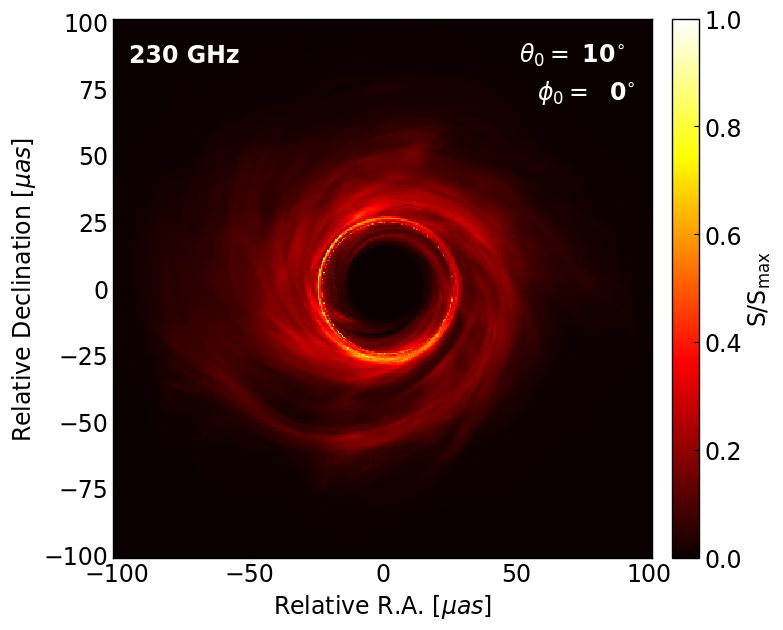

In [4]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [21]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [22]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc10/BHOSS_CODE
96, flux: 1.994528 at 9008.139053
97, flux: 1.928447 at 9017.844868
98, flux: 1.899697 at 9027.551100
99, flux: 1.900677 at 9038.646851
100, flux: 1.914872 at 9048.356431
101, flux: 1.914257 at 9058.061637
102, flux: 1.917370 at 9067.764826
103, flux: 1.884751 at 9077.464542
104, flux: 1.819133 at 9088.552963
105, flux: 1.784508 at 9098.254801
106, flux: 1.775730 at 9107.957635
107, flux: 1.762414 at 9117.659184
108, flux: 1.732679 at 9127.363548
109, flux: 1.729386 at 9138.452062
110, flux: 1.739147 at 9148.158890
111, flux: 1.766267 at 9157.868704
112, flux: 1.767492 at 9167.579583
113, flux: 1.759145 at 9178.672003
114, flux: 1.773610 at 9188.377169
115, flux: 1.785179 at 9198.079088
116, flux: 1.753282 at 9207.781556
117, flux: 1.703426 at 9217.482565
118, flux: 1.657225 at 9228.573654
119, flux: 1.641946 at 9238.281441
120, flux: 1.634743 at 9247.990304
121, flux: 1.626396 at 9257.698128
122, flux:

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.012264 Jy, the density scale = 7.700000e-19


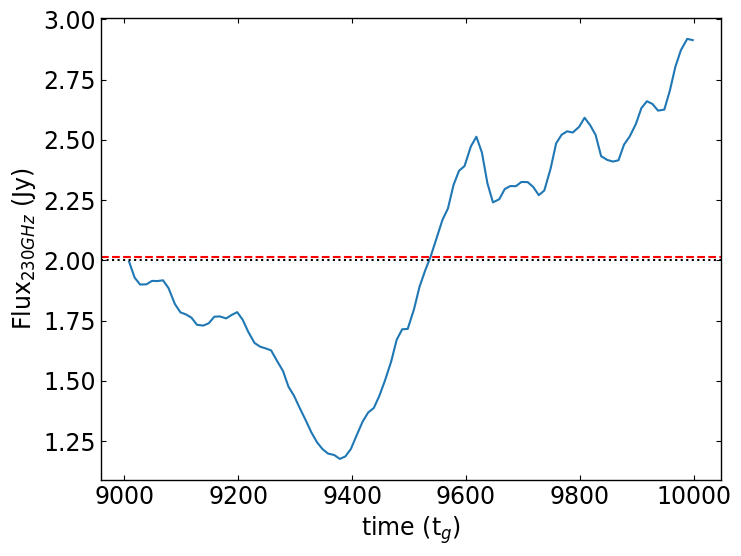

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.994528 Jy at 9008.139053
97:: 1.928447 Jy at 9017.844868
98:: 1.899697 Jy at 9027.551100
99:: 1.900677 Jy at 9038.646851
100:: 1.914872 Jy at 9048.356431
101:: 1.914257 Jy at 9058.061637
102:: 1.917370 Jy at 9067.764826
103:: 1.884751 Jy at 9077.464542
104:: 1.819133 Jy at 9088.552963
105:: 1.784508 Jy at 9098.254801
106:: 1.775730 Jy at 9107.957635
107:: 1.762414 Jy at 9117.659184
108:: 1.732679 Jy at 9127.363548
109:: 1.729386 Jy at 9138.452062
110:: 1.739147 Jy at 9148.158890
111:: 1.766267 Jy at 9157.868704
112:: 1.767492 Jy at 9167.579583
113:: 1.759145 Jy at 9178.672003
114:: 1.773610 Jy at 9188.377169
115:: 1.785179 Jy at 9198.079088
116:: 1.753282 Jy at 9207.781556
117:: 1.703426 Jy at 9217.482565
118:: 1.657225 Jy at 9228.573654
119:: 1.641946 Jy at 9238.281441
120:: 1.634743 Jy at 9247.990304
121:: 1.626396 Jy at 9257.698128
122:: 1.585509 Jy at 9267.401850
123:: 1.541205 Jy at 9278.487308
124:: 1.475662 Jy at 9288.189770
125:: 1.438193 Jy at 9297.894634
126:: 1.388891

In [27]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc30/BHOSS_CODE
96, flux: 2.069197 at 9008.139053
97, flux: 2.004214 at 9017.844868
98, flux: 1.973891 at 9027.551100
99, flux: 1.963463 at 9038.646851
100, flux: 1.977339 at 9048.356431
101, flux: 1.974907 at 9058.061637
102, flux: 1.976565 at 9067.764826
103, flux: 1.929151 at 9077.464542
104, flux: 1.865510 at 9088.552963
105, flux: 1.831148 at 9098.254801
106, flux: 1.831152 at 9107.957635
107, flux: 1.826766 at 9117.659184
108, flux: 1.802747 at 9127.363548
109, flux: 1.790598 at 9138.452062
110, flux: 1.794203 at 9148.158890
111, flux: 1.807480 at 9157.868704
112, flux: 1.803832 at 9167.579583
113, flux: 1.803000 at 9178.672003
114, flux: 1.819377 at 9188.377169
115, flux: 1.813031 at 9198.079088
116, flux: 1.772885 at 9207.781556
117, flux: 1.720348 at 9217.482565
118, flux: 1.675807 at 9228.573654
119, flux: 1.659048 at 9238.281441
120, flux: 1.650960 at 9247.990304
121, flux: 1.646923 at 9257.698128
122, flux:

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.012054 Jy, the density scale = 7.550000e-19


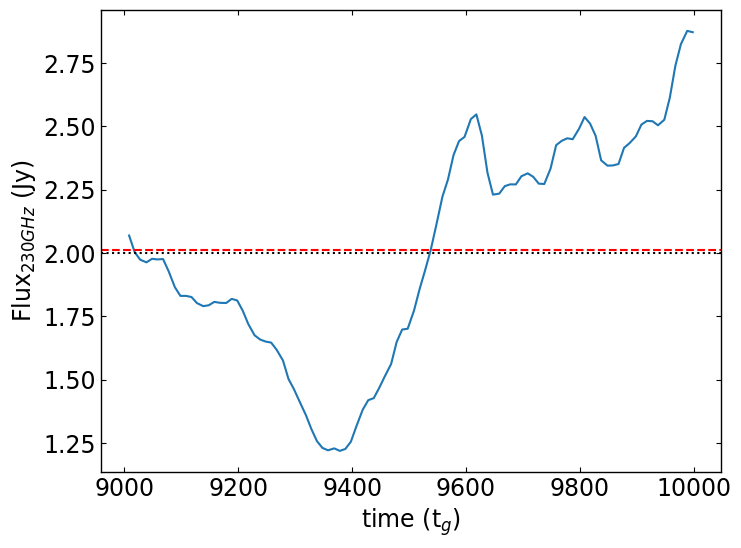

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.069197 Jy at 9008.139053
97:: 2.004214 Jy at 9017.844868
98:: 1.973891 Jy at 9027.551100
99:: 1.963463 Jy at 9038.646851
100:: 1.977339 Jy at 9048.356431
101:: 1.974907 Jy at 9058.061637
102:: 1.976565 Jy at 9067.764826
103:: 1.929151 Jy at 9077.464542
104:: 1.865510 Jy at 9088.552963
105:: 1.831148 Jy at 9098.254801
106:: 1.831152 Jy at 9107.957635
107:: 1.826766 Jy at 9117.659184
108:: 1.802747 Jy at 9127.363548
109:: 1.790598 Jy at 9138.452062
110:: 1.794203 Jy at 9148.158890
111:: 1.807480 Jy at 9157.868704
112:: 1.803832 Jy at 9167.579583
113:: 1.803000 Jy at 9178.672003
114:: 1.819377 Jy at 9188.377169
115:: 1.813031 Jy at 9198.079088
116:: 1.772885 Jy at 9207.781556
117:: 1.720348 Jy at 9217.482565
118:: 1.675807 Jy at 9228.573654
119:: 1.659048 Jy at 9238.281441
120:: 1.650960 Jy at 9247.990304
121:: 1.646923 Jy at 9257.698128
122:: 1.618389 Jy at 9267.401850
123:: 1.576385 Jy at 9278.487308
124:: 1.503275 Jy at 9288.189770
125:: 1.462387 Jy at 9297.894634
126:: 1.414662

In [32]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc50/BHOSS_CODE
96, flux: 2.115884 at 9008.139053
97, flux: 2.055605 at 9017.844868
98, flux: 2.012919 at 9027.551100
99, flux: 1.984187 at 9038.646851
100, flux: 2.001124 at 9048.356431
101, flux: 2.000451 at 9058.061637
102, flux: 1.998371 at 9067.764826
103, flux: 1.946376 at 9077.464542
104, flux: 1.902561 at 9088.552963
105, flux: 1.879725 at 9098.254801
106, flux: 1.904939 at 9107.957635
107, flux: 1.914333 at 9117.659184
108, flux: 1.894572 at 9127.363548
109, flux: 1.884867 at 9138.452062
110, flux: 1.855043 at 9148.158890
111, flux: 1.845338 at 9157.868704
112, flux: 1.840830 at 9167.579583
113, flux: 1.882832 at 9178.672003
114, flux: 1.864364 at 9188.377169
115, flux: 1.835492 at 9198.079088
116, flux: 1.789550 at 9207.781556
117, flux: 1.733233 at 9217.482565
118, flux: 1.690032 at 9228.573654
119, flux: 1.681074 at 9238.281441
120, flux: 1.670573 at 9247.990304
121, flux: 1.688319 at 9257.698128
122, flux:

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.988657 Jy, the density scale = 7.130000e-19


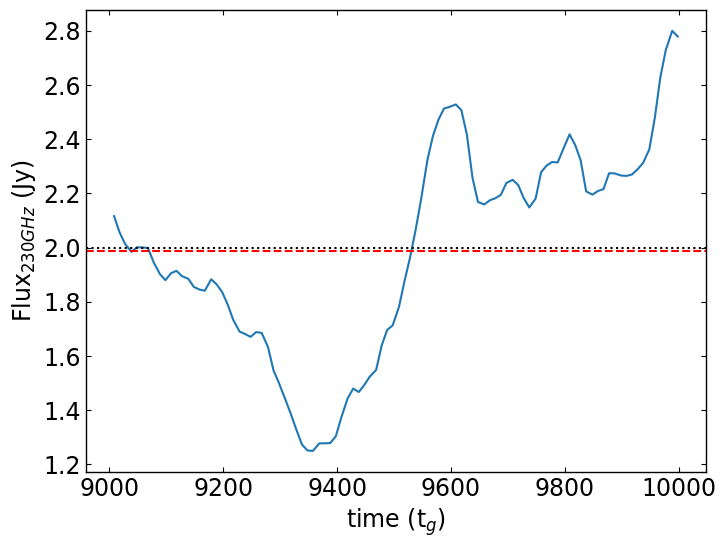

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.115884 Jy at 9008.139053
97:: 2.055605 Jy at 9017.844868
98:: 2.012919 Jy at 9027.551100
99:: 1.984187 Jy at 9038.646851
100:: 2.001124 Jy at 9048.356431
101:: 2.000451 Jy at 9058.061637
102:: 1.998371 Jy at 9067.764826
103:: 1.946376 Jy at 9077.464542
104:: 1.902561 Jy at 9088.552963
105:: 1.879725 Jy at 9098.254801
106:: 1.904939 Jy at 9107.957635
107:: 1.914333 Jy at 9117.659184
108:: 1.894572 Jy at 9127.363548
109:: 1.884867 Jy at 9138.452062
110:: 1.855043 Jy at 9148.158890
111:: 1.845338 Jy at 9157.868704
112:: 1.840830 Jy at 9167.579583
113:: 1.882832 Jy at 9178.672003
114:: 1.864364 Jy at 9188.377169
115:: 1.835492 Jy at 9198.079088
116:: 1.789550 Jy at 9207.781556
117:: 1.733233 Jy at 9217.482565
118:: 1.690032 Jy at 9228.573654
119:: 1.681074 Jy at 9238.281441
120:: 1.670573 Jy at 9247.990304
121:: 1.688319 Jy at 9257.698128
122:: 1.685186 Jy at 9267.401850
123:: 1.633434 Jy at 9278.487308
124:: 1.547401 Jy at 9288.189770
125:: 1.499590 Jy at 9297.894634
126:: 1.447080

In [55]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc70/BHOSS_CODE
96, flux: 2.194935 at 9008.139053
97, flux: 2.124862 at 9017.844868
98, flux: 2.054077 at 9027.551100
99, flux: 2.027479 at 9038.646851
100, flux: 2.066958 at 9048.356431
101, flux: 2.087963 at 9058.061637
102, flux: 2.090932 at 9067.764826
103, flux: 2.036382 at 9077.464542
104, flux: 2.045807 at 9088.552963
105, flux: 2.007392 at 9098.254801
106, flux: 2.045761 at 9107.957635
107, flux: 2.089078 at 9117.659184
108, flux: 2.058663 at 9127.363548
109, flux: 1.968321 at 9138.452062
110, flux: 1.924825 at 9148.158890
111, flux: 1.948801 at 9157.868704
112, flux: 1.947188 at 9167.579583
113, flux: 1.959553 at 9178.672003
114, flux: 1.957099 at 9188.377169
115, flux: 1.933315 at 9198.079088
116, flux: 1.863772 at 9207.781556
117, flux: 1.810724 at 9217.482565
118, flux: 1.809094 at 9228.573654
119, flux: 1.833285 at 9238.281441
120, flux: 1.838143 at 9247.990304
121, flux: 1.930282 at 9257.698128
122, flux:

In [56]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [57]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.028845 Jy, the density scale = 6.750000e-19


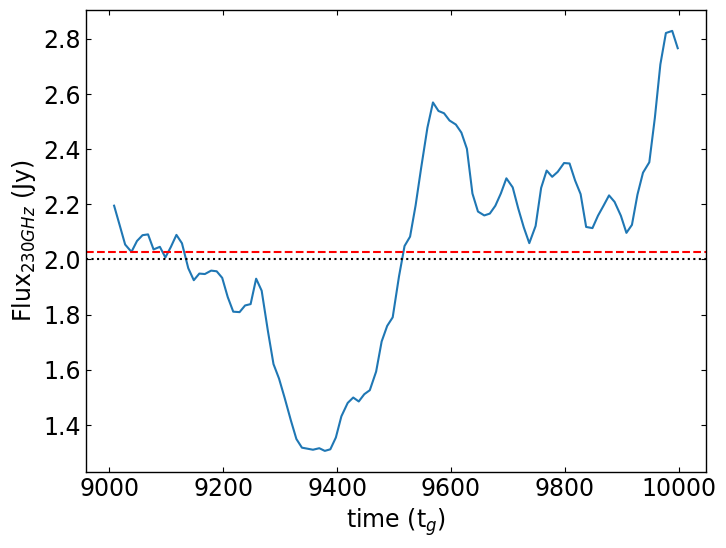

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [59]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.194935 Jy at 9008.139053
97:: 2.124862 Jy at 9017.844868
98:: 2.054077 Jy at 9027.551100
99:: 2.027479 Jy at 9038.646851
100:: 2.066958 Jy at 9048.356431
101:: 2.087963 Jy at 9058.061637
102:: 2.090932 Jy at 9067.764826
103:: 2.036382 Jy at 9077.464542
104:: 2.045807 Jy at 9088.552963
105:: 2.007392 Jy at 9098.254801
106:: 2.045761 Jy at 9107.957635
107:: 2.089078 Jy at 9117.659184
108:: 2.058663 Jy at 9127.363548
109:: 1.968321 Jy at 9138.452062
110:: 1.924825 Jy at 9148.158890
111:: 1.948801 Jy at 9157.868704
112:: 1.947188 Jy at 9167.579583
113:: 1.959553 Jy at 9178.672003
114:: 1.957099 Jy at 9188.377169
115:: 1.933315 Jy at 9198.079088
116:: 1.863772 Jy at 9207.781556
117:: 1.810724 Jy at 9217.482565
118:: 1.809094 Jy at 9228.573654
119:: 1.833285 Jy at 9238.281441
120:: 1.838143 Jy at 9247.990304
121:: 1.930282 Jy at 9257.698128
122:: 1.886764 Jy at 9267.401850
123:: 1.739147 Jy at 9278.487308
124:: 1.620732 Jy at 9288.189770
125:: 1.568261 Jy at 9297.894634
126:: 1.499589

In [60]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc90/BHOSS_CODE
96, flux: 2.127970 at 9008.139053
97, flux: 2.091930 at 9017.844868
98, flux: 2.044587 at 9027.551100
99, flux: 2.024392 at 9038.646851
100, flux: 2.078480 at 9048.356431
101, flux: 2.026633 at 9058.061637
102, flux: 2.035143 at 9067.764826
103, flux: 1.976841 at 9077.464542
104, flux: 1.978159 at 9088.552963
105, flux: 1.946112 at 9098.254801
106, flux: 2.019868 at 9107.957635
107, flux: 2.076824 at 9117.659184
108, flux: 2.010770 at 9127.363548
109, flux: 1.968742 at 9138.452062
110, flux: 1.922716 at 9148.158890
111, flux: 1.952371 at 9157.868704
112, flux: 1.952254 at 9167.579583
113, flux: 1.966263 at 9178.672003
114, flux: 1.918228 at 9188.377169
115, flux: 1.915749 at 9198.079088
116, flux: 1.874503 at 9207.781556
117, flux: 1.820529 at 9217.482565
118, flux: 1.822716 at 9228.573654
119, flux: 1.864552 at 9238.281441
120, flux: 1.853016 at 9247.990304
121, flux: 1.856585 at 9257.698128
122, flux:

In [61]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [62]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.989776 Jy, the density scale = 6.350000e-19


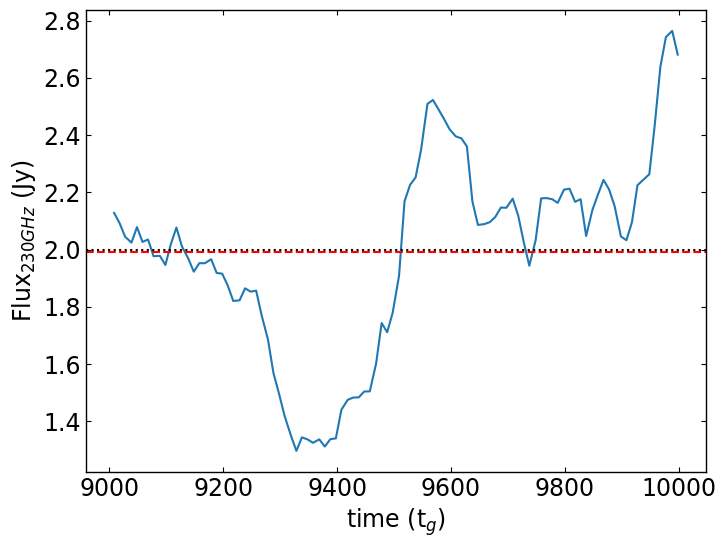

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [64]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.127970 Jy at 9008.139053
97:: 2.091930 Jy at 9017.844868
98:: 2.044587 Jy at 9027.551100
99:: 2.024392 Jy at 9038.646851
100:: 2.078480 Jy at 9048.356431
101:: 2.026633 Jy at 9058.061637
102:: 2.035143 Jy at 9067.764826
103:: 1.976841 Jy at 9077.464542
104:: 1.978159 Jy at 9088.552963
105:: 1.946112 Jy at 9098.254801
106:: 2.019868 Jy at 9107.957635
107:: 2.076824 Jy at 9117.659184
108:: 2.010770 Jy at 9127.363548
109:: 1.968742 Jy at 9138.452062
110:: 1.922716 Jy at 9148.158890
111:: 1.952371 Jy at 9157.868704
112:: 1.952254 Jy at 9167.579583
113:: 1.966263 Jy at 9178.672003
114:: 1.918228 Jy at 9188.377169
115:: 1.915749 Jy at 9198.079088
116:: 1.874503 Jy at 9207.781556
117:: 1.820529 Jy at 9217.482565
118:: 1.822716 Jy at 9228.573654
119:: 1.864552 Jy at 9238.281441
120:: 1.853016 Jy at 9247.990304
121:: 1.856585 Jy at 9257.698128
122:: 1.769926 Jy at 9267.401850
123:: 1.685520 Jy at 9278.487308
124:: 1.568023 Jy at 9288.189770
125:: 1.496553 Jy at 9297.894634
126:: 1.419599